In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import layers, optimizers, callbacks

In [64]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape = (254, 254, 3)))

model.add(layers.Conv2D(filters = 32, kernel_size = (5,5), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = "same") )

model.add(layers.Conv2D(filters = 64, kernel_size = (4,4), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = "same") )


model.add(layers.Conv2D(filters = 64, kernel_size = (4,4), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(3, 3), padding = "same") )


model.add(layers.Conv2D(filters = 128, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(filters = 256, kernel_size = (3,3), activation="relu", padding = "same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding = "same") )

model.add(layers.Dropout(0.3))

model.add(layers.Flatten())

# Here we flatten our data to end up with just one dimension

model.add(layers.Dense(128, activation="relu"))

model.add(layers.Dense(5, activation="softmax"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [57]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_3 (Rescaling)              │ (None, 254, 254, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 254, 254, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 85, 85, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 85, 85, 64)          │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 29, 29, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 14)                  │           1,806 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 766,734 (2.92 MB)

 Trainable params: 766,734 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

In [66]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss='categorical_crossentropy',
              optimizer= adam,
              metrics=['accuracy'])

In [59]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/subset/subset/train',
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(254, 254),
  batch_size=32)

val_ds = image_dataset_from_directory(
  '/content/drive/MyDrive/subset/subset/val',
  labels = "inferred",
  label_mode = "categorical",
  seed=123,
  image_size=(254, 254),
  batch_size=32)

Found 1029 files belonging to 5 classes.
Found 254 files belonging to 5 classes.


In [61]:
class_names = train_ds.class_names
print(class_names)

['DrinkCans', 'GlassBottles', 'Organic', 'Paper', 'PlasticBottles']


In [60]:
class_val_names = val_ds.class_names
print(class_val_names)

['DrinkCans', 'GlassBottles', 'Organic', 'Paper', 'PlasticBottles']


In [62]:
#MODEL = "model_1"

#modelCheckpooint = callbacks.ModelCheckpoint("{}.h5".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = callbacks.ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, restore_best_weights=True)

In [67]:
%%time

history = model.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [LRreducer, EarlyStopper])

Epoch 1/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 22s 487ms/step - accuracy: 0.2933 - loss: 1.5466 - val_accuracy: 0.3504 - val_loss: 1.4333 - learning_rate: 0.0010
Epoch 2/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 28s 231ms/step - accuracy: 0.3650 - loss: 1.4417 - val_accuracy: 0.4488 - val_loss: 1.3077 - learning_rate: 0.0010
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.4356 - loss: 1.3442 - val_accuracy: 0.4449 - val_loss: 1.3305 - learning_rate: 0.0010
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 217ms/step - accuracy: 0.4537 - loss: 1.3144 - val_accuracy: 0.5354 - val_loss: 1.2263 - learning_rate: 0.0010
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 206ms/step - accuracy: 0.5080 - loss: 1.2261 - val_accuracy: 0.5551 - val_loss: 1.1529 - learning_rate: 0.0010
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 213ms/step - accuracy: 0.5734 - loss: 1.1150 - val_accuracy: 0.6142 - val_loss: 1.1363 - learning_rate: 0.0010
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.5725 - loss: 1.1125

In [78]:
import matplotlib.pyplot as plt

def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

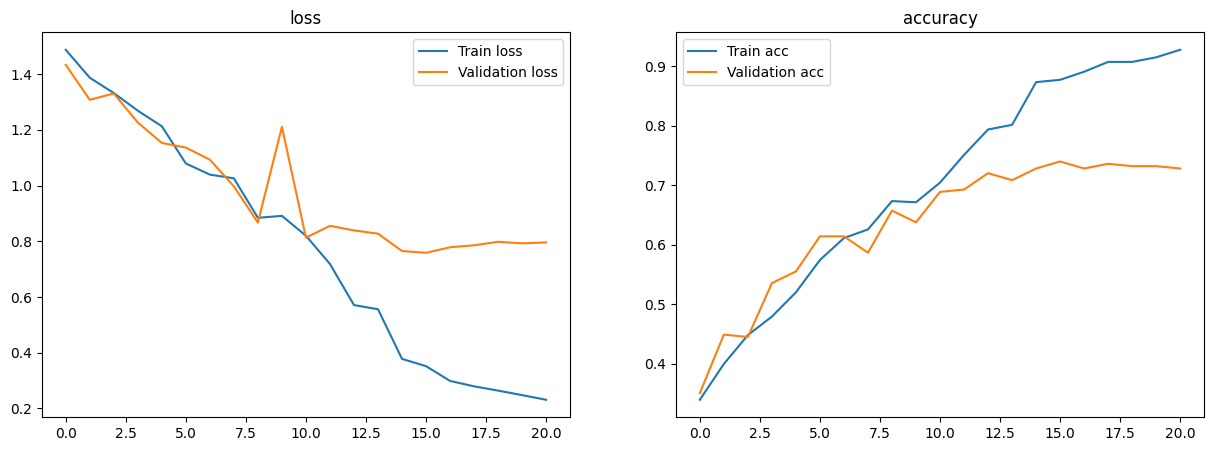

In [69]:
plot_history(history)

In [79]:
from tensorflow.image import resize

def preprocess_image(image):
    image = resize(image, (254, 254))  # Resize
    #image = image / 255.0  # Scale
    return image

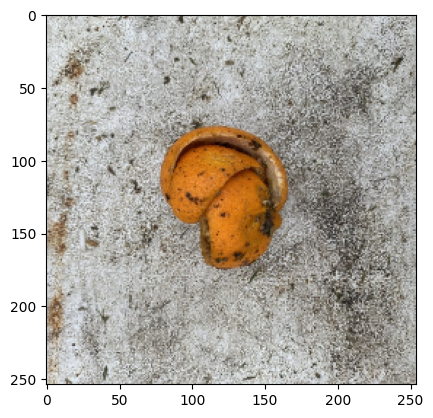

In [95]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

image = load_img('/content/drive/MyDrive/subset/subset/test/Organic/Organic_42.jpg')
image = img_to_array(preprocess_image(image))
plt.imshow(image / 255.0)

In [96]:
import numpy as np
image = image.reshape((-1, 254, 254, 3))
res = model.predict(image)
class_names[np.argmax(res)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


'Organic'

In [97]:
model.save('/content/drive/MyDrive/subset/baseline.keras')
model.save('/content/drive/MyDrive/subset/baseline.h5')